<a href="https://colab.research.google.com/github/Godwin-Rukki/Godwin-Data-Analytics-Portfolio/blob/Projects/Godwin_Idiovo_Beats_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
file_path = '/content/Godwin_idiovo_merged_data_cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,review_id,product_id,title,author,rating,content,timestamp,profile_id,helpful_count,product_attributes,verified_ratings,color_encoded,review_date
0,0,RHP5S7VJZFNHB,B06XRHPMV6,5.0 out of 5 stars Best portable speaker in th...,shroomshady,5,"Incredible sound quality, easily pairs with Bl...","Reviewed in the United States June 28, 2021",AFD5XPHWP2CFLW5PUCJ7OURU7K5Q,5,Color: Black,1,0,2021-06-28
1,1,R321PM8IM57S2H,B06XRHPMV6,5.0 out of 5 stars Nice Speaker,millenium,5,Ease of use was very nice,"Reviewed in the United States July 12, 2024",AGWC5SLVNU3YU2QXJVFNVYOBEUXQ,0,Color: Red,1,16,2024-07-12
2,2,RRD85O0DWZ7HK,B06XRHPMV6,5.0 out of 5 stars The Greatest Speaker EVER!!!!!,Amazon Customer,5,This speaker is one of the best ones i have pu...,"Reviewed in the United States February 29, 2016",AHPKHC24RIWTNSA7T2EZYYMTMERA,6,Color: White,1,19,2016-02-29
3,3,R2L1L91BH8GE40,B06XRHPMV6,5.0 out of 5 stars Solid Speaker,Cory Drollinger,5,"Ok, so before I bought this speaker I read som...","Reviewed in the United States July 8, 2020",AH5E4PYUC4R7L3TIVQAPMVNHCR6A,18,Color: Black,1,0,2020-07-08
4,4,R1BCJWA8XCQYOE,B06XRHPMV6,5.0 out of 5 stars GREAT Purchase for Music Lo...,Prosperity,5,My Pill+ and I have a love affair going on. I'...,"Reviewed in the United States December 9, 2016",AGBAMFNVWJ7KBE2E6XYWRBCFZRHA,1,Color: Black,1,0,2016-12-09


In [ ]:
df.columns
df= df.drop(columns=['Unnamed: 0'])
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,helpful_count,product_attributes,verified_ratings,color_encoded,review_date
0,RHP5S7VJZFNHB,B06XRHPMV6,5.0 out of 5 stars Best portable speaker in th...,shroomshady,5,"Incredible sound quality, easily pairs with Bl...","Reviewed in the United States June 28, 2021",AFD5XPHWP2CFLW5PUCJ7OURU7K5Q,5,Color: Black,1,0,2021-06-28
1,R321PM8IM57S2H,B06XRHPMV6,5.0 out of 5 stars Nice Speaker,millenium,5,Ease of use was very nice,"Reviewed in the United States July 12, 2024",AGWC5SLVNU3YU2QXJVFNVYOBEUXQ,0,Color: Red,1,16,2024-07-12
2,RRD85O0DWZ7HK,B06XRHPMV6,5.0 out of 5 stars The Greatest Speaker EVER!!!!!,Amazon Customer,5,This speaker is one of the best ones i have pu...,"Reviewed in the United States February 29, 2016",AHPKHC24RIWTNSA7T2EZYYMTMERA,6,Color: White,1,19,2016-02-29
3,R2L1L91BH8GE40,B06XRHPMV6,5.0 out of 5 stars Solid Speaker,Cory Drollinger,5,"Ok, so before I bought this speaker I read som...","Reviewed in the United States July 8, 2020",AH5E4PYUC4R7L3TIVQAPMVNHCR6A,18,Color: Black,1,0,2020-07-08
4,R1BCJWA8XCQYOE,B06XRHPMV6,5.0 out of 5 stars GREAT Purchase for Music Lo...,Prosperity,5,My Pill+ and I have a love affair going on. I'...,"Reviewed in the United States December 9, 2016",AGBAMFNVWJ7KBE2E6XYWRBCFZRHA,1,Color: Black,1,0,2016-12-09


In [ ]:
df.isnull().sum()

,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
helpful_count,0
product_attributes,0


In [ ]:
#identify each distinct values in product_id column

distinct_product_ids = df['product_id'].unique()
distinct_product_ids

array(['B06XRHPMV6', 'B099TJGJ91', 'B08X4YMTPM', 'B01MTB55WH',
       'B0CY6TTR3C', 'B09XXW54QG', 'B0BW2LVJ4P', 'B0BC27MM5Z',
       'B0CQM1794W', 'B0BDKWL2FT'], dtype=object)

In [ ]:
# Create a dictionary to map product_ids to names (you can customize these names)
product_name_mapping = {
       'B06XRHPMV6': 'Beats Pill plus',
       'B099TJGJ91': 'Bose Soundlink Flex',
       'B08X4YMTPM': 'JBL charge 5',
       'B01MTB55WH': 'Anker Soundcore 2',
       'B0CY6TTR3C': 'Sono Roam 2',
       'B09XXW54QG': 'Marshall Emberton 2',
       'B0BW2LVJ4P': 'Sonos Era 100',
       'B0BC27MM5Z': 'Marshall Aton 3',
       'B0CQM1794W': 'Vanzon V40',
       'B0BDKWL2FT': 'Ortizan 40W',
}
# Create a new column 'product_name' using the mapping
df['product_name'] = df['product_id'].map(product_name_mapping)

# Print the updated DataFrame
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,helpful_count,product_attributes,verified_ratings,color_encoded,review_date,product_name
0,RHP5S7VJZFNHB,B06XRHPMV6,5.0 out of 5 stars Best portable speaker in th...,shroomshady,5,"Incredible sound quality, easily pairs with Bl...","Reviewed in the United States June 28, 2021",AFD5XPHWP2CFLW5PUCJ7OURU7K5Q,5,Color: Black,1,0,2021-06-28,Beats Pill plus
1,R321PM8IM57S2H,B06XRHPMV6,5.0 out of 5 stars Nice Speaker,millenium,5,Ease of use was very nice,"Reviewed in the United States July 12, 2024",AGWC5SLVNU3YU2QXJVFNVYOBEUXQ,0,Color: Red,1,16,2024-07-12,Beats Pill plus
2,RRD85O0DWZ7HK,B06XRHPMV6,5.0 out of 5 stars The Greatest Speaker EVER!!!!!,Amazon Customer,5,This speaker is one of the best ones i have pu...,"Reviewed in the United States February 29, 2016",AHPKHC24RIWTNSA7T2EZYYMTMERA,6,Color: White,1,19,2016-02-29,Beats Pill plus
3,R2L1L91BH8GE40,B06XRHPMV6,5.0 out of 5 stars Solid Speaker,Cory Drollinger,5,"Ok, so before I bought this speaker I read som...","Reviewed in the United States July 8, 2020",AH5E4PYUC4R7L3TIVQAPMVNHCR6A,18,Color: Black,1,0,2020-07-08,Beats Pill plus
4,R1BCJWA8XCQYOE,B06XRHPMV6,5.0 out of 5 stars GREAT Purchase for Music Lo...,Prosperity,5,My Pill+ and I have a love affair going on. I'...,"Reviewed in the United States December 9, 2016",AGBAMFNVWJ7KBE2E6XYWRBCFZRHA,1,Color: Black,1,0,2016-12-09,Beats Pill plus


In [ ]:
# calculate the sentiment score of each  review  and create a new column called sentiment_score

# Function to calculate sentiment score using TextBlob
def get_sentiment_score(review):
  try:
    analysis = TextBlob(review)
    return analysis.sentiment.polarity
  except:
    return 0  # Handle cases where sentiment analysis fails

# Apply the function to the 'review_body' column and create a new column 'sentiment_score'
df['sentiment_score'] = df['content'].apply(get_sentiment_score)

# Print the updated DataFrame
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,helpful_count,product_attributes,verified_ratings,color_encoded,review_date,product_name,sentiment_score
0,RHP5S7VJZFNHB,B06XRHPMV6,5.0 out of 5 stars Best portable speaker in th...,shroomshady,5,"Incredible sound quality, easily pairs with Bl...","Reviewed in the United States June 28, 2021",AFD5XPHWP2CFLW5PUCJ7OURU7K5Q,5,Color: Black,1,0,2021-06-28,Beats Pill plus,0.310939
1,R321PM8IM57S2H,B06XRHPMV6,5.0 out of 5 stars Nice Speaker,millenium,5,Ease of use was very nice,"Reviewed in the United States July 12, 2024",AGWC5SLVNU3YU2QXJVFNVYOBEUXQ,0,Color: Red,1,16,2024-07-12,Beats Pill plus,0.780000
2,RRD85O0DWZ7HK,B06XRHPMV6,5.0 out of 5 stars The Greatest Speaker EVER!!!!!,Amazon Customer,5,This speaker is one of the best ones i have pu...,"Reviewed in the United States February 29, 2016",AHPKHC24RIWTNSA7T2EZYYMTMERA,6,Color: White,1,19,2016-02-29,Beats Pill plus,0.269901
3,R2L1L91BH8GE40,B06XRHPMV6,5.0 out of 5 stars Solid Speaker,Cory Drollinger,5,"Ok, so before I bought this speaker I read som...","Reviewed in the United States July 8, 2020",AH5E4PYUC4R7L3TIVQAPMVNHCR6A,18,Color: Black,1,0,2020-07-08,Beats Pill plus,0.262577
4,R1BCJWA8XCQYOE,B06XRHPMV6,5.0 out of 5 stars GREAT Purchase for Music Lo...,Prosperity,5,My Pill+ and I have a love affair going on. I'...,"Reviewed in the United States December 9, 2016",AGBAMFNVWJ7KBE2E6XYWRBCFZRHA,1,Color: Black,1,0,2016-12-09,Beats Pill plus,0.372842


In [ ]:
Selected_product_1 = df[df['product_name'] == 'Beats Pill plus']
Selected_product_1.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,100.000000,100.00000,100.0,100.000000,100.000000
mean,4.700000,3.66000,1.0,5.210000,0.284607
std,0.627646,13.04632,0.0,8.229406,0.173795
min,1.000000,0.00000,1.0,0.000000,-0.037424
25%,5.000000,0.00000,1.0,0.000000,0.173607
50%,5.000000,0.00000,1.0,0.000000,0.280371
75%,5.000000,1.00000,1.0,16.000000,0.377480
max,5.000000,86.00000,1.0,19.000000,0.900000


In [ ]:
selected_product_2 = df[df['product_name'] == 'Bose Soundlink Flex']
selected_product_2.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,10.000000,10.000000,10.0,10.000000,10.000000
mean,4.900000,46.200000,1.0,10.800000,0.277990
std,0.316228,81.649386,0.0,8.495751,0.128729
min,4.000000,0.000000,1.0,0.000000,0.135194
25%,5.000000,3.750000,1.0,1.750000,0.179671
50%,5.000000,11.500000,1.0,13.500000,0.223636
75%,5.000000,26.000000,1.0,17.000000,0.378566
max,5.000000,255.000000,1.0,20.000000,0.490000


In [ ]:
selected_product_3 = df[df['product_name'] == 'JBL charge 5']
selected_product_3.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,100.000000,100.000000,100.0,100.000000,100.000000
mean,4.890000,1.630000,1.0,4.360000,0.335134
std,0.345096,8.641753,0.0,6.346112,0.262529
min,3.000000,0.000000,1.0,0.000000,-0.412879
25%,5.000000,0.000000,1.0,0.000000,0.151581
50%,5.000000,0.000000,1.0,0.000000,0.333333
75%,5.000000,0.000000,1.0,5.000000,0.500000
max,5.000000,79.000000,1.0,19.000000,1.000000


In [ ]:
selected_product_4 = df[df['product_name'] == 'Anker Soundcore 2']
selected_product_4.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,100.000000,100.0000,100.0,100.0000,100.000000
mean,4.760000,19.1900,1.0,0.8200,0.280612
std,0.570663,173.9166,0.0,3.5968,0.198814
min,1.000000,0.0000,1.0,0.0000,-0.200000
25%,5.000000,0.0000,1.0,0.0000,0.155419
50%,5.000000,0.0000,1.0,0.0000,0.250219
75%,5.000000,0.0000,1.0,0.0000,0.422388
max,5.000000,1740.0000,1.0,18.0000,0.800000


In [ ]:
selected_product_5 = df[df['product_name'] == 'Sono Roam 2']
selected_product_5.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,3.79000,2.060000,0.650000,7.410000,0.233122
std,1.49271,4.203942,0.479372,9.313935,0.232715
min,1.00000,0.000000,0.000000,0.000000,-0.312500
25%,3.00000,0.000000,0.000000,0.000000,0.061151
50%,4.00000,0.000000,1.000000,0.000000,0.193929
75%,5.00000,2.000000,1.000000,19.000000,0.382668
max,5.00000,23.000000,1.000000,19.000000,0.800000


In [ ]:
selected_product_6 = df[df['product_name'] == 'Marshall Emberton 2']
selected_product_6.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,100.000000,100.000000,100.0,100.000000,100.000000
mean,4.780000,2.840000,1.0,3.000000,0.327648
std,0.483673,17.060629,0.0,3.190896,0.228414
min,3.000000,0.000000,1.0,1.000000,-0.064732
25%,5.000000,0.000000,1.0,1.000000,0.175646
50%,5.000000,0.000000,1.0,1.000000,0.300000
75%,5.000000,1.000000,1.0,3.000000,0.460417
max,5.000000,168.000000,1.0,9.000000,1.000000


In [ ]:
selected_product_7 = df[df['product_name'] == 'Sonos Era 100']
selected_product_7.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,100.0000,100.000000,100.0,100.000000,100.000000
mean,3.8100,3.090000,1.0,8.650000,0.240741
std,1.5615,4.956569,0.0,9.108077,0.222717
min,1.0000,0.000000,1.0,2.000000,-0.369048
25%,2.0000,0.000000,1.0,2.000000,0.090141
50%,5.0000,1.000000,1.0,2.000000,0.218924
75%,5.0000,3.000000,1.0,21.000000,0.401042
max,5.0000,23.000000,1.0,21.000000,0.800000


In [ ]:
selected_product_8 = df[df['product_name'] == 'Marshall Aton 3']
selected_product_8.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,100.000000,100.000000,100.0,100.000000,100.000000
mean,4.810000,3.580000,1.0,0.880000,0.326311
std,0.464823,7.802072,0.0,2.515728,0.209515
min,3.000000,0.000000,1.0,0.000000,-0.150000
25%,5.000000,0.000000,1.0,0.000000,0.189091
50%,5.000000,1.000000,1.0,0.000000,0.314550
75%,5.000000,3.000000,1.0,0.000000,0.421250
max,5.000000,56.000000,1.0,8.000000,0.809167


In [ ]:
selected_product_9 = df[df['product_name'] == 'Vanzon V40']
selected_product_9.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,100.0,100.000000,100.0,100.000000,100.000000
mean,4.5,1.190000,1.0,11.520000,0.284611
std,1.0,6.408162,0.0,6.277232,0.172773
min,1.0,0.000000,1.0,0.000000,-0.054286
25%,4.0,0.000000,1.0,15.000000,0.165110
50%,5.0,0.000000,1.0,15.000000,0.276667
75%,5.0,0.000000,1.0,15.000000,0.376640
max,5.0,61.000000,1.0,15.000000,0.750000


In [ ]:
selected_product_10 = df[df['product_name'] == 'Ortizan 40W']
selected_product_10.describe()

,rating,helpful_count,verified_ratings,color_encoded,sentiment_score
count,200.000000,200.000000,200.0,200.0,200.000000
mean,4.540000,1.810000,1.0,13.0,0.290268
std,0.591735,13.399689,0.0,0.0,0.248905
min,3.000000,0.000000,1.0,13.0,-0.800000
25%,4.000000,0.000000,1.0,13.0,0.169253
50%,5.000000,0.000000,1.0,13.0,0.256306
75%,5.000000,0.000000,1.0,13.0,0.434375
max,5.000000,134.000000,1.0,13.0,0.910000


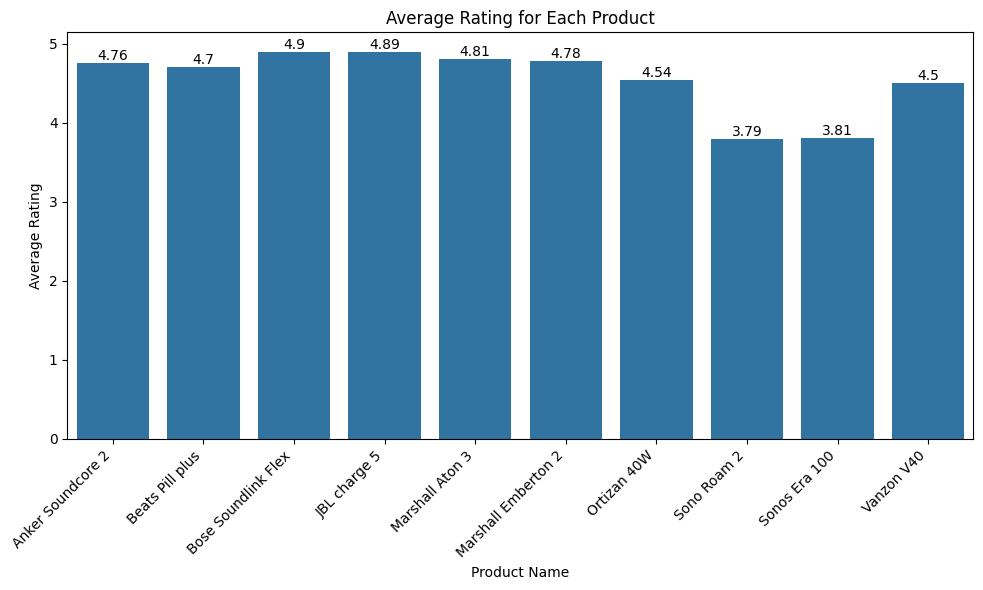

In [ ]:
#Bar chart using all 10 product_name and the average of the rating
# Group by product_name and calculate the average rating
average_ratings = df.groupby('product_name')['rating'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_ratings.index, y=average_ratings.values) # Set x and y values explicitly.
for bar in plt.gca().patches: #Removed extra indent
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **The Average Rating of All 10 Products**
The figure about shows the average rating for all 10 products and the beats pill product, performed poorly compared to it's competitors.
The Beat Pill plus product had a 4.7 which on it's own is an impressive score but in comparison with it's competitors it ranks in the middle. More analysis would be carried out to find why.

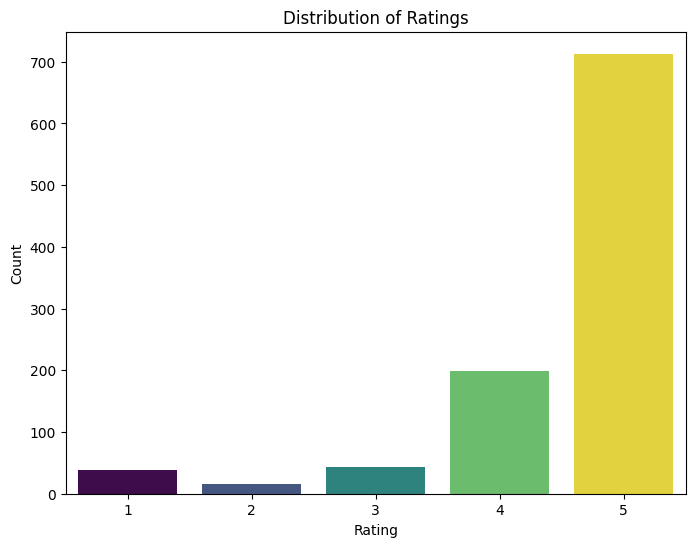

In [ ]:
# visualizing how the ratings are distributed
rating_distribution = df['rating'].value_counts().sort_index()

# ploting the rating distribution

plt.figure(figsize=(8, 6))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, hue=rating_distribution.index, palette='viridis', legend=False)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

### **Distribution of Ratings**

The figure above shows the distribution of ratings. This just shows that if the ratings of all 10 products are added together you'd see how close the competition of a 5 star rated product is between all 10 products

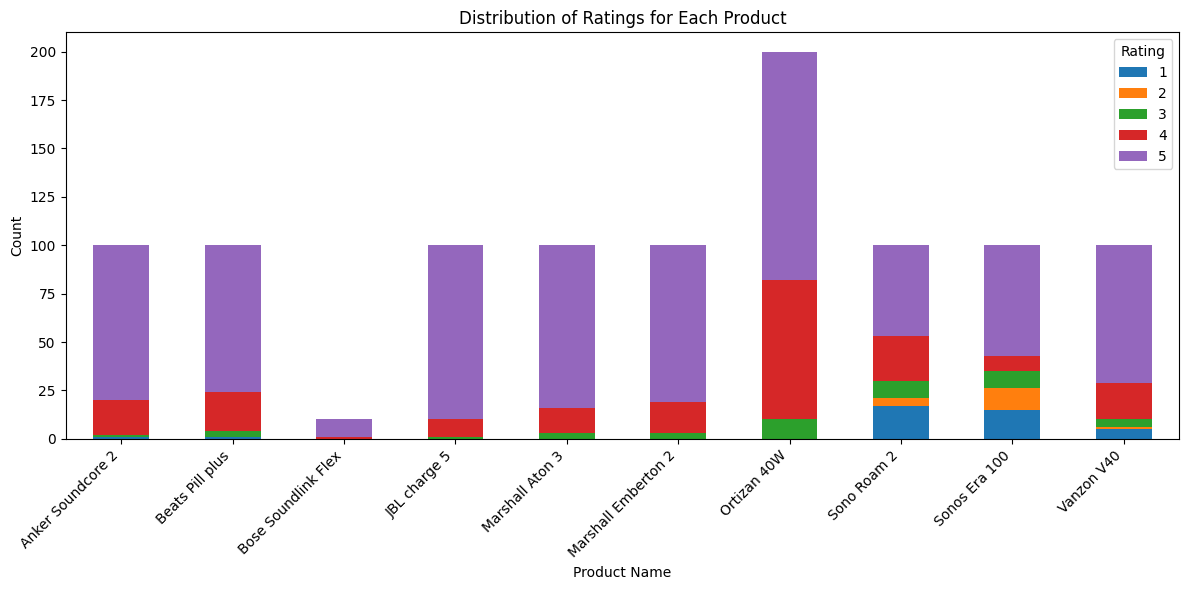

In [ ]:
# prompt: visualizing how the ratings are distributed for all ten products using a stacked or multi bar chart with each figures for each rating

import matplotlib.pyplot as plt
# Group by product_name and rating, then count the occurrences
rating_counts = df.groupby(['product_name', 'rating'])['rating'].count().unstack()

# Create a stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Distribution of Ratings for Each Product')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

### **Distribution of Ratings for Each Product**

The figure above shows the distribution of ratings for all 10 products.

Since the last figure showed the total distribution of ratings I thought why not have one that shows the distribution of ratings for each product individually.

From this figure you can see there's an outlier in the bunch well two, 1 that only had 10 reviews and the other that had 200 review aside the normal 10. When compared to the others with 100 reviews each beats pill plus ranked in 3 being surpassed by JBL and Anker.

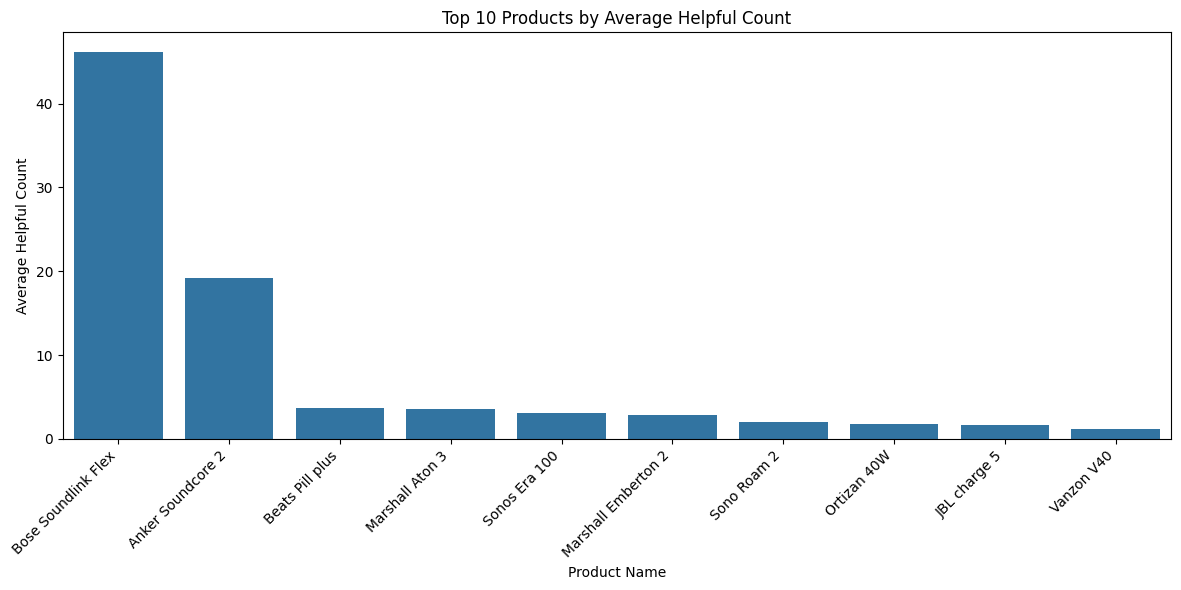

In [ ]:
# Calculate the average helpful count for each product
average_helpful_count = df.groupby('product_name')['helpful_count'].mean()

# Select the top 10 products by average helpful count
top_10_products = average_helpful_count.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.xlabel('Product Name')
plt.ylabel('Average Helpful Count')
plt.title('Top 10 Products by Average Helpful Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Average Helpful_Count per Product**

The figure above shows how helpful others found each reviews.

Being that Bose is an outlier with only 10 reviews. This figure shows that Anker hand the better average helpful count. This seems intriguing and more analysis will be done.

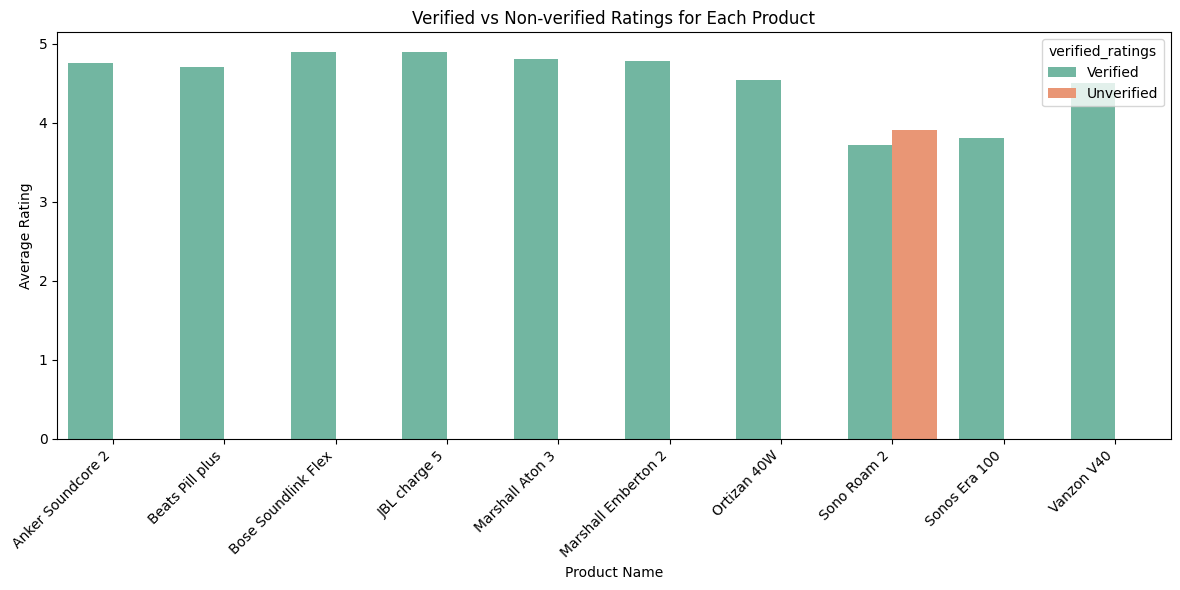

In [ ]:
# Calculate average verified rating vs non-verified rating for each product
verified_rating_by_product = df.groupby(['product_name', 'verified_ratings'])['rating'].mean().reset_index()

# Convert 'verified_ratings' to strings for categorical plotting
verified_rating_by_product['verified_ratings'] = verified_rating_by_product['verified_ratings'].map({1: 'Verified', 0: 'Unverified'})

# Visualize verified vs non-verified ratings for each product
plt.figure(figsize=(12, 6))
sns.barplot(x='product_name', y='rating', hue='verified_ratings', data=verified_rating_by_product, palette='Set2')
plt.title('Verified vs Non-verified Ratings for Each Product')
plt.xlabel('Product Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Verified vs Non-verified Ratings for Each Product**

The figure above shows how many verified and non verified ratings each product had.

Surprisingly only SONO ROAM 2 had non verified ratings and they were more than it's verified ratings

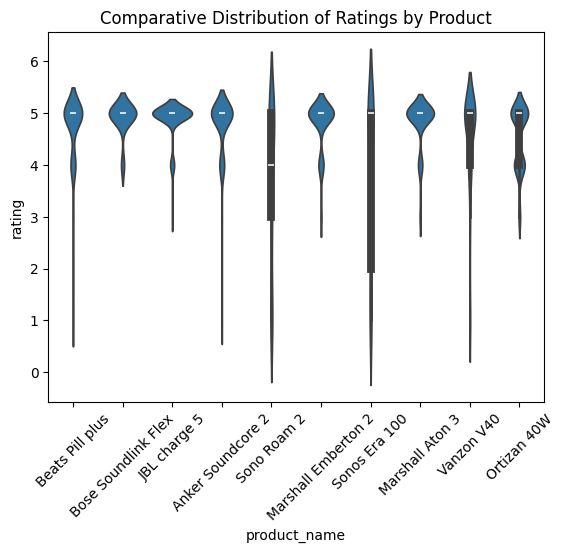

In [ ]:
sns.violinplot(x='product_name', y='rating', data=df)
plt.title('Comparative Distribution of Ratings by Product')
plt.xticks(rotation=45)
plt.show()

### **Comparative Distribution of Ratings by Product**

I just did this to show figuratively the side to side comparison of ratings distribution from 1 - 5 for each product.

From the figure above we can see that some products didn't have a rating lower than 3, while we can also note that some product had 0 ratings. For the Beat Pill plus, we can see that it's rating started at 1.

It would be nice to figure what is making some product rating start at one and while others start at 3

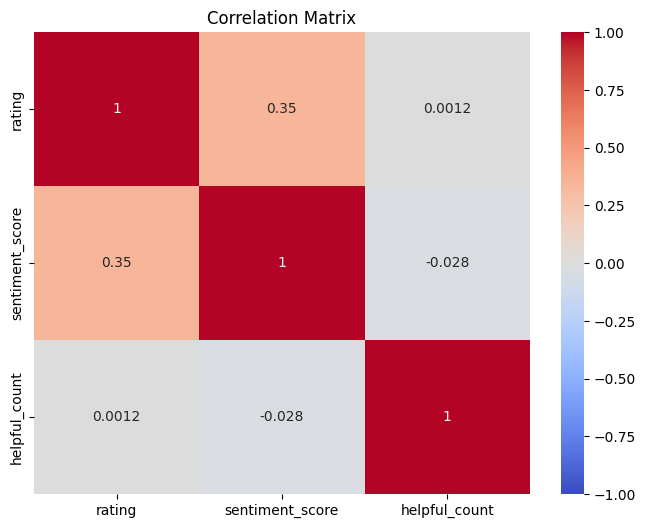

In [ ]:

# Correlation matrix for numerical features
corr_matrix = df[['rating', 'sentiment_score', 'helpful_count']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### **Correlation Matrix Between Rating, Sentiment Score, and Helpful Count**


The figure above shows the nature of the relationship between rating, sentiment score, helpful count and how they affect or not affect each other.

- **Helpful Count and Rating**: this had a correlation of 0.0012 this shows that it has an extremely weak positive linear relationship. In simple terms it just shows there is either not enough data to prove that helpful count and rating affects each other that much or they don't

- **Helpful Count and sentiment score**: this had a correlation of -0.028. This shows that it has an extremely weak negative linear relationship. In simple terms it just shows there is either not enough data or helpful count doesn't affect sentiment score and vice versa.

- **Sentiment score and rating**: this had a correlation of 0.35. This shows that it has a moderately strong positive linear relationship. In simple terms it shows that the higher the rating the higher the sentiment score and vice versa.

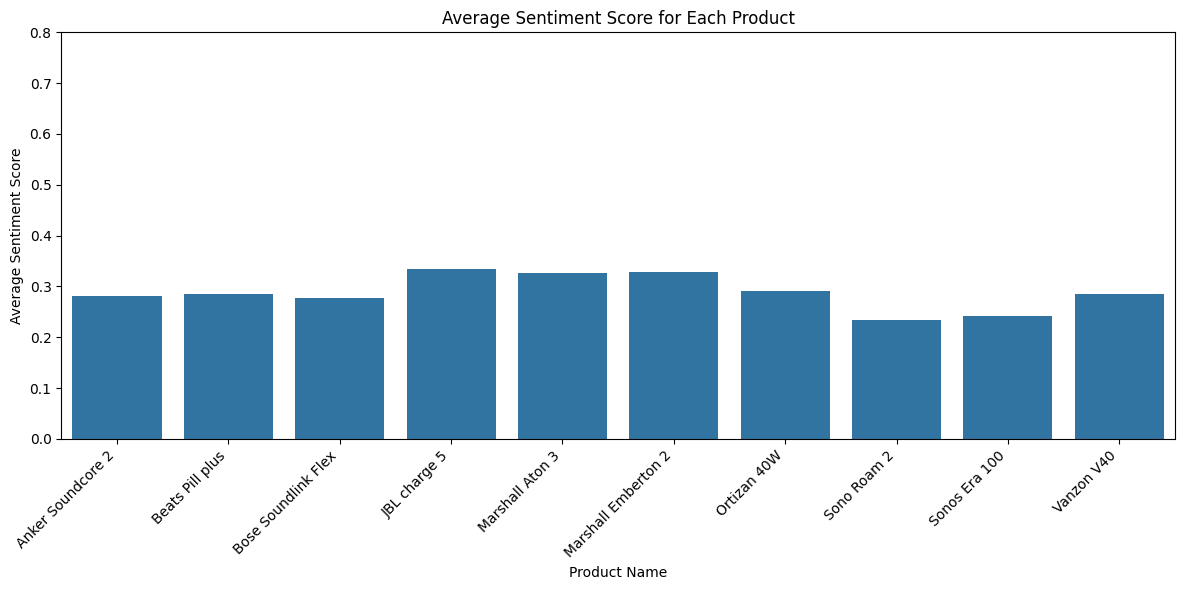

In [ ]:
# using the sentiment_score visualize the average sentiment score for every product_name


# Group by product_name and calculate the average sentiment score
average_sentiment_score = df.groupby('product_name')['sentiment_score'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sentiment_score.index, y=average_sentiment_score.values)
plt.xlabel('Product Name')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score for Each Product')
plt.xticks(rotation=45, ha='right')
plt.ylim (0, 0.8)
plt.tight_layout()
plt.show()

### **Average Sentiment Score for Each Product**


This figure above shows the average sentiment score per product. Just like the average rating for each product the Beats Pill plus product fairly poorly when compared to it's competitors

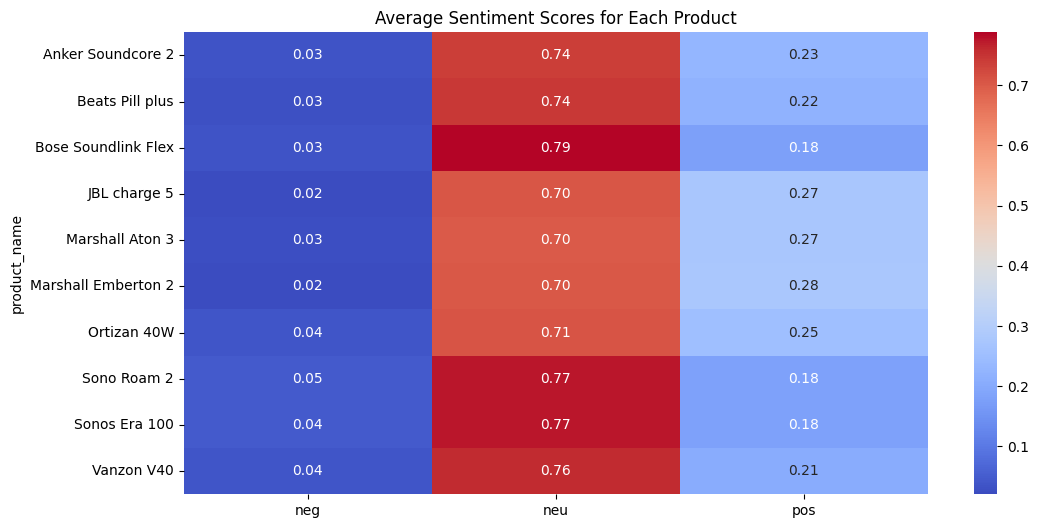

In [ ]:

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_vader_sentiment_scores(review):
  try:
    return sia.polarity_scores(review)
  except:
    return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}

# Apply the function to the 'review_body' column and create new columns for each sentiment score
df[['neg', 'neu', 'pos', 'compound']] = df['content'].apply(lambda x: pd.Series(get_vader_sentiment_scores(x)))

# Group by product_name and calculate the average sentiment scores
average_sentiment_scores = df.groupby('product_name')[['neg', 'neu', 'pos']].mean()

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(average_sentiment_scores, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Sentiment Scores for Each Product')
plt.show()

### **Average Sentiment Score (Positive, Neutral, Negative) for Each Product**


The figure above is a heat map of the average of the positive, neutral and negative sentiment score. Just like average sentiment score and rating it shows a pattern of the Beat Plus Pill rank 5th amongst their competitors

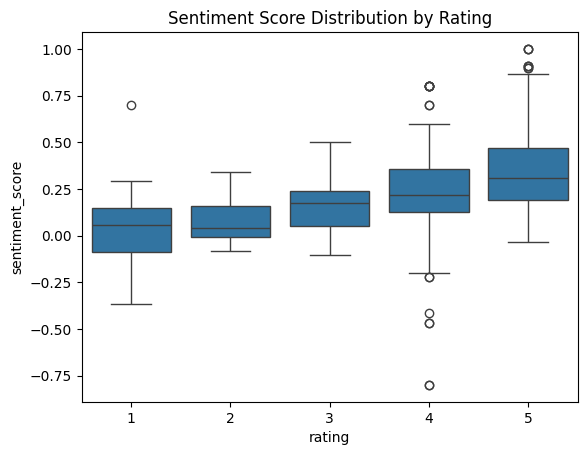

In [ ]:
sns.boxplot(x='rating', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution by Rating')
plt.show()

### **Sentiment Score Distribution by Rating**


The figure above shows a box plot depicting the distribution of sentiment scores based on product ratings from 1 to 5. Each box represents the interquartile range (IQR) of sentiment scores for each rating, with the middle line indicating the median sentiment score. Ratings of 4 and 5 have higher sentiment scores, reflecting more positive reviews, while lower ratings (1-3) show more neutral or negative sentiment, with outliers present in most ratings.

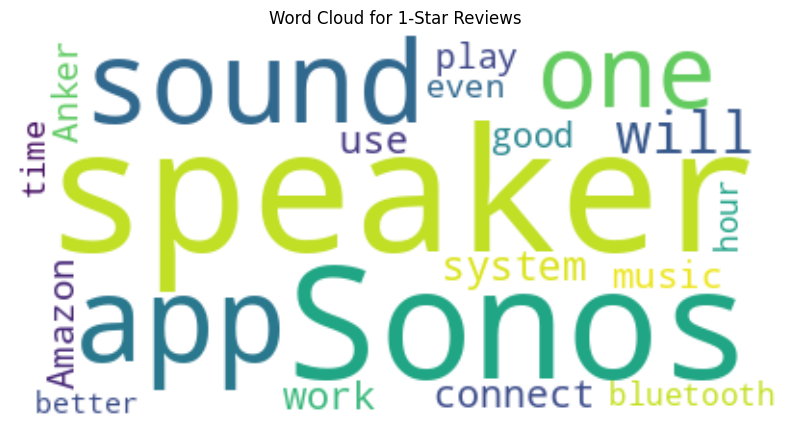

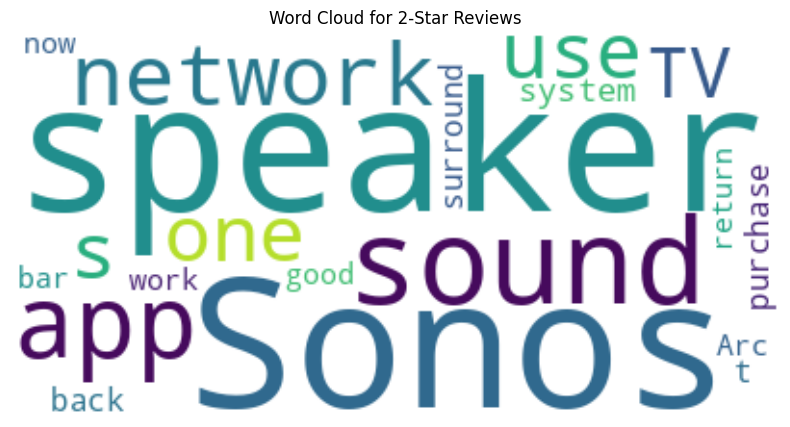

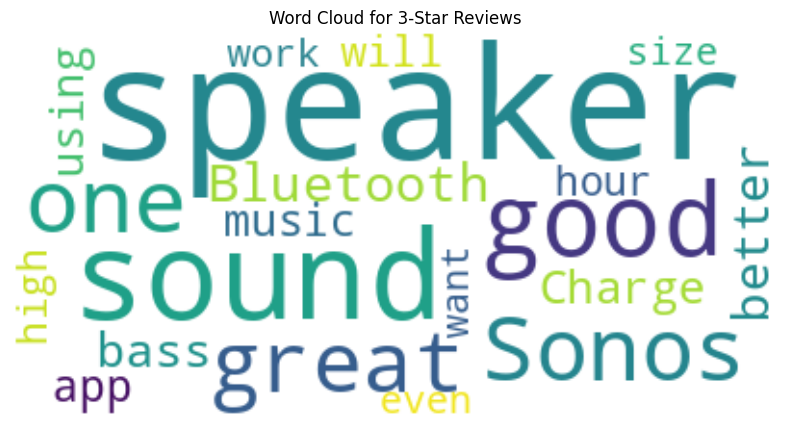

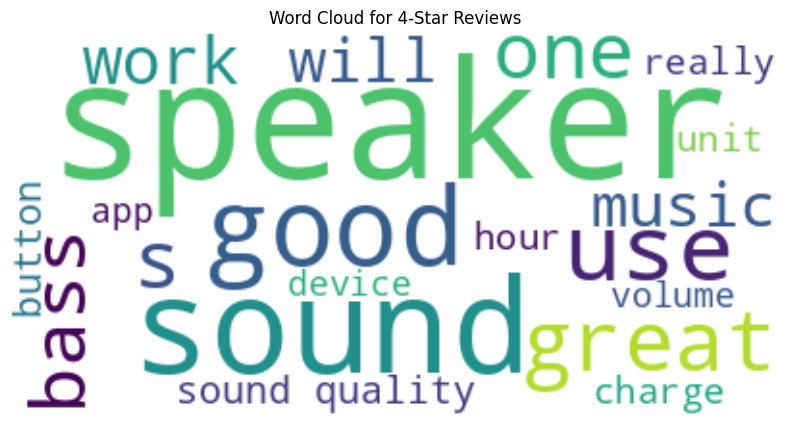

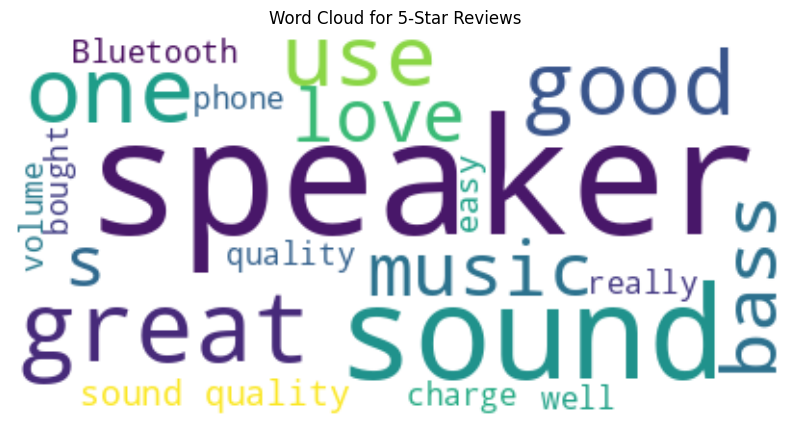

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(data, rating):
    text = ' '.join(data[data['rating'] == rating]['content'].tolist())
    wordcloud = WordCloud(background_color='white', max_words=20).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {rating}-Star Reviews')
    plt.show()

# Generate word cloud for 1-star and 5-star ratings
generate_wordcloud(df, 1)
generate_wordcloud(df, 2)
generate_wordcloud(df, 3)
generate_wordcloud(df, 4)
generate_wordcloud(df, 5)

### **Word Cloud per Rating**

The figures above shows the top 20 words per Rating.

For ratings 1 & 2 we can see words like hour, connect, return, purchase, surround etc

For Rating 3 we can see words like sound, charge, work, better, good etc

For ratings 4 & 5 we can see words like bass, great sounds, love, quality etc.

In [ ]:
import pandas as pd
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources (if not already present)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess the review text
def preprocess_text(text):
    if isinstance(text, str):  # Ensure text is a string
        # Lowercase the text
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize the text
        words = word_tokenize(text)
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        return words
    else:
        return []

# Function to get most common words for each rating in the "Beat Pill Plus" product
def most_common_words_beat_pill(df, num_common=5):
    # Filter the dataframe to only include "Beat Pill Plus"
    print("Filtering for 'Beat Pill Plus' product...")
    product_df = df[df['product_name'] == "Beats Pill plus"]

    # Debugging: Check if there are any rows for the product
    print(f"Number of rows for 'Beat Pill Plus': {len(product_df)}")

    # Dictionary to store common words for each rating within the product
    rating_word_frequencies = {}

    # Loop through each rating
    for rating in sorted(product_df['rating'].unique()):
        print(f"\nProcessing rating: {rating}")
        # Filter the reviews for the current rating
        reviews = product_df[product_df['rating'] == rating]['content']
        all_words = []

        # Debugging: Print number of reviews for the current rating
        print(f"Number of reviews for rating {rating}: {len(reviews)}")

        # Preprocess each review and collect words
        for review in reviews:
            words = preprocess_text(review)
            all_words.extend(words)

        if not all_words:
            print(f"No words found for rating: {rating}")
        else:
            # Calculate word frequency
            word_counts = Counter(all_words)
            # Get the most common words
            most_common = [word for word, count in word_counts.most_common(num_common)]
            rating_word_frequencies[rating] = most_common
            print(f"Most common words for rating {rating}: {most_common}")

    # Convert the results into a tabular format
    rows = []
    for rating, words in rating_word_frequencies.items():
        row = {"Rating": rating}
        for i, word in enumerate(words):
            row[f"Word {i+1}"] = word
        rows.append(row)

    result_df = pd.DataFrame(rows)

    return result_df

# Call the function and get the most common words for "Beat Pill Plus"
common_words_beat_pill = most_common_words_beat_pill(df)

# Display the result
print(common_words_beat_pill)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Filtering for 'Beat Pill Plus' product...
Number of rows for 'Beat Pill Plus': 100

Processing rating: 1
Number of reviews for rating 1: 1
Most common words for rating 1: ['button', 'one', 'sound', 'speaker', 'skip']

Processing rating: 3
Number of reviews for rating 3: 3
Most common words for rating 3: ['speaker', 'pill', 'xl', 'good', 'back']

Processing rating: 4
Number of reviews for rating 4: 20
Most common words for rating 4: ['sound', 'speaker', 'good', 'quality', 'pill']

Processing rating: 5
Number of reviews for rating 5: 76
Most common words for rating 5: ['sound', 'speaker', '’', 'pill', 'beats']
   Rating   Word 1   Word 2 Word 3   Word 4 Word 5
0       1   button      one  sound  speaker   skip
1       3  speaker     pill     xl     good   back
2       4    sound  speaker   good  quality   pill
3       5    sound  speaker      ’     pill  beats


### **Top 5 Word Per Rating For Beats Pill Plus**

The information above just contains the top 5 words per Rating for the beat pill plus. After the word cloud I wanted to analyze specifically what words were observed per Rating in the beats pill plus so as to give an inclination of what we did wrong and what we did right.

Form the table above, in rating 1 we can see words like the button, sound, skip all of which may suggest that there's a problem with the design usability of the speakers buttons either relating to the ability to increase volume or skip songs

While in Ratings 4 & 5 we can denote that the speaker is liked for it's good quality and for it's sound.

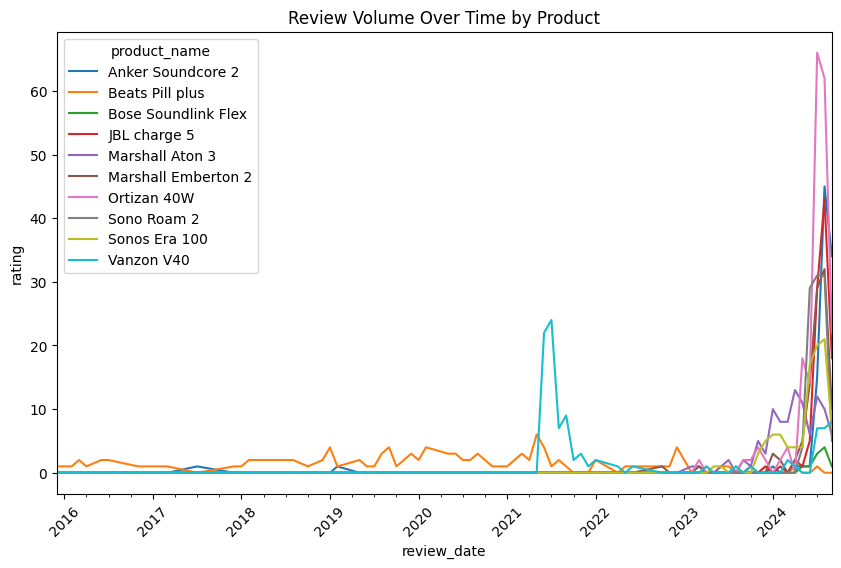

In [ ]:

df['review_date'] = pd.to_datetime(df['review_date'])  # Convert to datetime if not already

df_time = df.groupby([df['review_date'].dt.to_period('M'), 'product_name']).size().unstack().fillna(0)
df_time.plot(kind='line', figsize=(10, 6))
plt.title('Review Volume Over Time by Product')
plt.ylabel('rating')
plt.xticks(rotation=45)
plt.show()

### **Review Volume Over Time By Product**


The figure above shows the amount of reviews given over time and it also shows the age some what each product.

We can see from the line graph above that the beats pill plus has reviews as early as 2016 making it one of two of the oldest product. This could also speak to why the beats product faired poorly when compared to the other competitors because they are much more newer and advanced than the beats product.

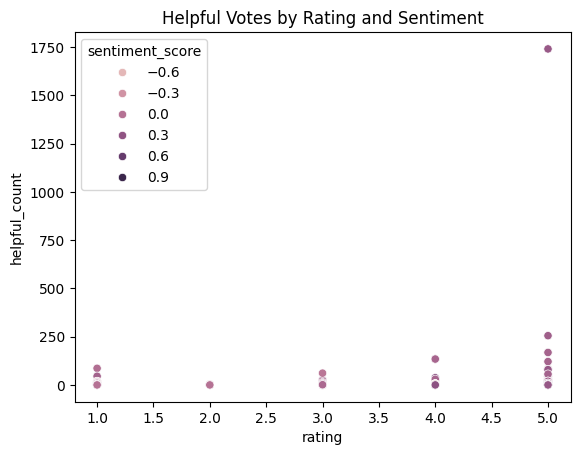

In [ ]:
sns.scatterplot(x='rating', y='helpful_count', hue='sentiment_score', data=df)
plt.title('Helpful Votes by Rating and Sentiment')
plt.show()

### **Helpful Votes By Rating and Sentiment**

The figure above visualizes the relationship between product ratings, sentiment scores, and helpful votes. Each dot represents a review, with its color indicating the sentiment score (ranging from negative to positive). The x-axis represents the rating (1-5), while the y-axis shows the count of helpful votes.

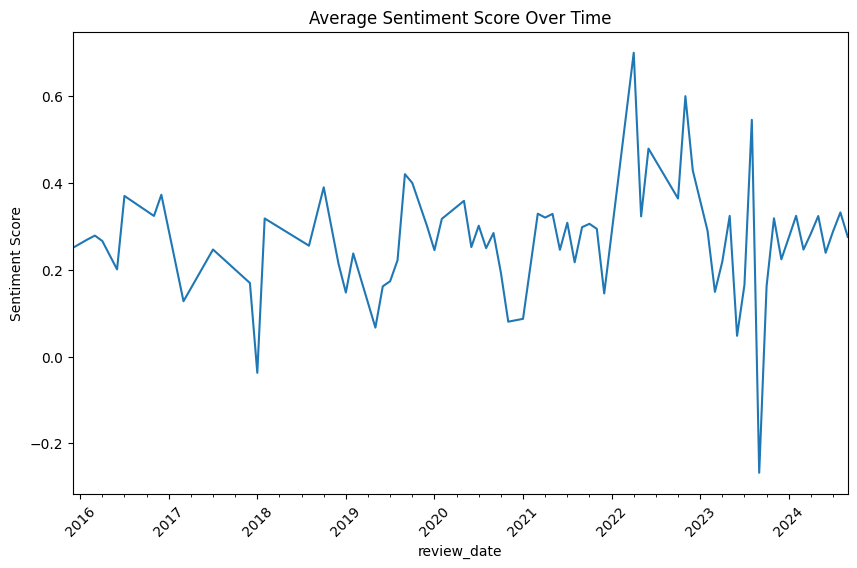

In [ ]:
df_time_sentiment = df.groupby(df['review_date'].dt.to_period('M'))['sentiment_score'].mean()
df_time_sentiment.plot(kind='line', figsize=(10, 6))
plt.title('Average Sentiment Score Over Time')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()

### **Average Sentiment Score Over Time**

The line graph above shows the average **Sentiment Score** of customer reviews over time, starting from 2016 and going up to 2024. The **Sentiment Score** represents the overall tone of the reviews, where higher scores indicate more positive feedback and lower scores indicate more negative or neutral feedback.

### Key Observations:
1. **Fluctuations Over Time**:
   - The average sentiment tends to fluctuate. Some periods show a rise in positive reviews (peaks), while others show a decline (dips).
   
2. **Noticeable Spikes**:
   - Around 2022, there’s a significant spike, indicating a period when customers were leaving highly positive reviews.
   - Following this, there is a steep drop in 2023, showing a period when reviews were more negative or neutral.

3. **Recent Stability**:
   - In the later part of the graph (2023-2024), the sentiment score seems to stabilize, but it is slightly lower than earlier years.

### Interpretation:
The sentiment of customer feedback has been quite inconsistent over the years, with periods of positive and negative trends. The sharp drop in 2023 could indicate a specific event that led to more negative reviews, while the steady levels afterward suggest that customer sentiment has leveled out but remains somewhat mixed.

In simple terms: **Customers have had a mix of positive and negative feelings over time, with some periods better than others.**

          product_name  avg_rating  avg_sentiment  total_reviews
0    Anker Soundcore 2        4.76       0.280612            100
1      Beats Pill plus        4.70       0.284607            100
2  Bose Soundlink Flex        4.90       0.277990             10
3         JBL charge 5        4.89       0.335134            100
4      Marshall Aton 3        4.81       0.326311            100
5  Marshall Emberton 2        4.78       0.327648            100
6          Ortizan 40W        4.54       0.290268            200
7          Sono Roam 2        3.79       0.233122            100
8        Sonos Era 100        3.81       0.240741            100
9           Vanzon V40        4.50       0.284611            100


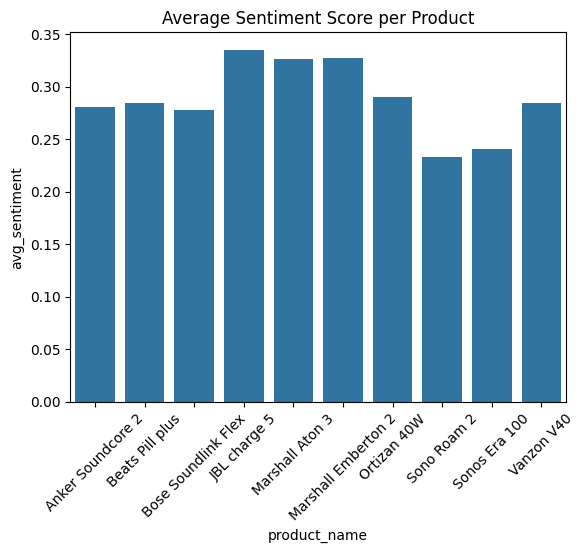

In [ ]:
product_analysis = df.groupby('product_name').agg(
    avg_rating=('rating', 'mean'),
    avg_sentiment=('sentiment_score', 'mean'),
    total_reviews=('content', 'count')
).reset_index()

print(product_analysis)

# Create simple visual
sns.barplot(x='product_name', y='avg_sentiment', data=product_analysis)
plt.title('Average Sentiment Score per Product')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract common keywords from reviews
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['content'])

# Convert to dataframe
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
keywords_df['sentiment_score'] = df['sentiment_score']

# Correlate keywords with sentiment
correlations = keywords_df.corr()['sentiment_score'].sort_values(ascending=False)
print(correlations)

sentiment_score    1.000000
great              0.194374
easy               0.088640
good               0.048855
love               0.038722
quality            0.015643
price             -0.009036
sound             -0.022531
bluetooth         -0.039947
battery           -0.062331
music             -0.067527
really            -0.072329
use               -0.080841
speaker           -0.089196
bass              -0.104842
volume            -0.116400
speakers          -0.123407
little            -0.124942
just              -0.125798
sonos             -0.139423
like              -0.153608
Name: sentiment_score, dtype: float64


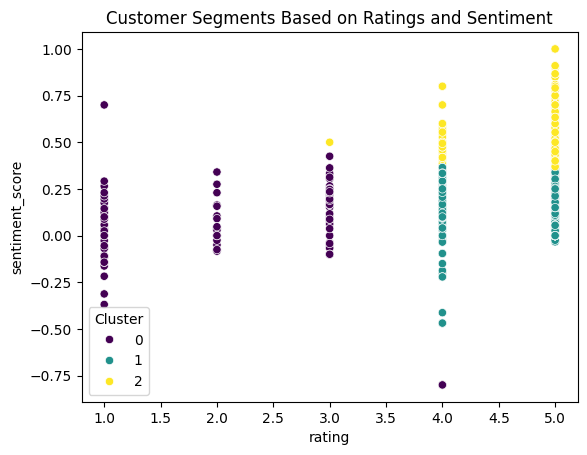

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assume 'Rating' and 'Sentiment_Score' are important features for clustering
features = df[['rating', 'sentiment_score']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x= 'rating', y='sentiment_score', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segments Based on Ratings and Sentiment')
plt.show()

### **Customer Segments Based on Ratings and Sentiment**

The figure above categorizes customer segments based on product ratings and sentiment scores. Each dot represents a review, with clusters (0, 1, 2) distinguished by different colors. The x-axis shows the rating (1 to 5), while the y-axis represents the sentiment score (ranging from negative to positive). Cluster 0 (purple) includes lower ratings with more negative sentiment, Cluster 1 (green) represents mid-range ratings, and Cluster 2 (yellow) captures high ratings and positive sentiment, indicating distinct customer sentiment behaviors.

In [ ]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for Rating and Sentiment_Score
rating_skewness = skew(df['rating'])
rating_kurtosis = kurtosis(df['rating'])

sentiment_skewness = skew(df['sentiment_score'])
sentiment_kurtosis = kurtosis(df['sentiment_score'])

print(f"Rating Skewness: {rating_skewness:.2f}, Kurtosis: {rating_kurtosis:.2f}")
print(f"Sentiment Score Skewness: {sentiment_skewness:.2f}, Kurtosis: {sentiment_kurtosis:.2f}")

Rating Skewness: -2.40, Kurtosis: 5.54
Sentiment Score Skewness: 0.09, Kurtosis: 1.29


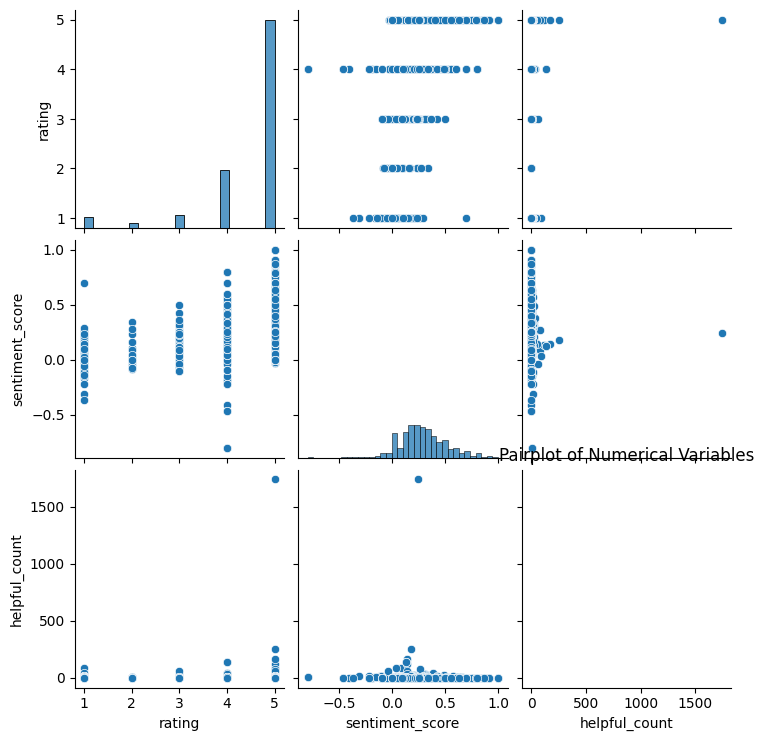

In [ ]:
# Pairplot to examine relationships between variables
sns.pairplot(df[['rating', 'sentiment_score', 'helpful_count']])
plt.title('Pairplot of Numerical Variables')
plt.show()


### **Pairplot To Examines the Relationship Between Variables**


The figures above is a "pairplot," which shows relationships between several numerical variables in a dataset: `rating`, `sentiment_score`, and `helpful_count`. Here’s a breakdown of what this plot is trying to communicate, explained simply:

### Key Variables:
- **Rating**: The score people gave the product, likely on a scale from 1 to 5, with 5 being the highest.
- **Sentiment Score**: A calculated measure that likely tells how positive or negative the review text is. Higher values are more positive, and lower values are more negative.
- **Helpful Count**: The number of people who found the review helpful (possibly based on user votes).

### Interpreting the Relationships:
1. **Rating vs. Sentiment Score**:
   - As you’d expect, higher ratings (4 or 5) correspond with positive sentiment scores (closer to 1).
   - Lower ratings (like 1) have more negative or neutral sentiment scores.
   - This shows that people who give high ratings usually write positive reviews, and people who give low ratings write more negative reviews.

2. **Rating vs. Helpful Count**:
   - Most reviews have relatively low helpful counts, but there’s one review with a very high helpful count (close to 1500), which might be an outlier.
   - Ratings of 4 and 5 seem to have more helpful votes than lower ratings, indicating that people tend to find positive reviews more helpful.

3. **Sentiment Score vs. Helpful Count**:
   - Similar to the rating pattern, reviews with a more positive sentiment (closer to 1) tend to have more helpful votes.
   - There's a large cluster of reviews with low helpful counts, suggesting most reviews don’t receive many helpful votes, except for a few outliers.

### Overall Insights:
- **Ratings and Sentiment Align**: Positive ratings are tied to positive sentiments, while negative ratings are tied to negative sentiments.
- **Helpful Reviews are Mostly Positive**: The more helpful a review is deemed, the higher the rating and sentiment score, though there are some exceptions.
- **Outliers**: There are a few data points where reviews have extremely high helpful counts. These may be notable for further investigation, as they stand out significantly from the rest of the data.

In [ ]:
df.head()



,review_id,product_id,title,author,rating,content,timestamp,profile_id,helpful_count,product_attributes,verified_ratings,color_encoded,review_date,product_name,sentiment_score
0,RHP5S7VJZFNHB,B06XRHPMV6,5.0 out of 5 stars Best portable speaker in th...,shroomshady,5,"Incredible sound quality, easily pairs with Bl...","Reviewed in the United States June 28, 2021",AFD5XPHWP2CFLW5PUCJ7OURU7K5Q,5,Color: Black,1,0,2021-06-28,Beats Pill plus,0.310939
1,R321PM8IM57S2H,B06XRHPMV6,5.0 out of 5 stars Nice Speaker,millenium,5,Ease of use was very nice,"Reviewed in the United States July 12, 2024",AGWC5SLVNU3YU2QXJVFNVYOBEUXQ,0,Color: Red,1,16,2024-07-12,Beats Pill plus,0.780000
2,RRD85O0DWZ7HK,B06XRHPMV6,5.0 out of 5 stars The Greatest Speaker EVER!!!!!,Amazon Customer,5,This speaker is one of the best ones i have pu...,"Reviewed in the United States February 29, 2016",AHPKHC24RIWTNSA7T2EZYYMTMERA,6,Color: White,1,19,2016-02-29,Beats Pill plus,0.269901
3,R2L1L91BH8GE40,B06XRHPMV6,5.0 out of 5 stars Solid Speaker,Cory Drollinger,5,"Ok, so before I bought this speaker I read som...","Reviewed in the United States July 8, 2020",AH5E4PYUC4R7L3TIVQAPMVNHCR6A,18,Color: Black,1,0,2020-07-08,Beats Pill plus,0.262577
4,R1BCJWA8XCQYOE,B06XRHPMV6,5.0 out of 5 stars GREAT Purchase for Music Lo...,Prosperity,5,My Pill+ and I have a love affair going on. I'...,"Reviewed in the United States December 9, 2016",AGBAMFNVWJ7KBE2E6XYWRBCFZRHA,1,Color: Black,1,0,2016-12-09,Beats Pill plus,0.372842


# **General Summary from EDA and Sentiment Analysis**

### Summary of Findings from EDA and Sentiment Analysis for Beats by Dre

1. **Product Ratings**: Only the SONO ROAM 2 had non-verified ratings, outnumbering verified ones, raising questions about review authenticity.

2. **Helpful Count**: Despite its popularity, the Beats Pill Plus received a lower helpful count compared to Anker, indicating a need for improved review quality.

3. **Overall Ratings**: The Beats Pill Plus ranked third overall, with an average rating of 4.7, trailing JBL and Anker, which likely offer newer features.

4. **Sentiment Analysis**: There is a moderate positive correlation (0.35) between ratings and sentiment scores. However, the Beats Pill Plus ranks fifth in sentiment, suggesting room for improvement.

5. **Rating Discrepancies**: The Beats Pill Plus had ratings as low as 1, with negative reviews citing usability and connectivity issues. Positive reviews praised sound quality and bass.

6. **Review Age**: The Beats Pill Plus, being older (released in 2016), may lag behind newer models that incorporate advanced features.

7. **Common Issues**: Lower-rated reviews often mentioned "button" and "connect," highlighting usability problems. Higher-rated reviews focused on sound quality.

8. **Correlations**: Minimal correlation between helpful count and ratings (-0.0012) suggests that user sentiment does not significantly affect perceived helpfulness of reviews.

### Implications for Beats by Dre

- **Product Development**: Address usability concerns to improve future iterations of the Beats Pill Plus.
  
- **Customer Engagement**: Encourage detailed feedback from verified buyers to enhance review quality.

- **Marketing Strategy**: Highlight sound quality and consider launching updated models to remain competitive.

- **User Satisfaction**: Focus on features that enhance user experience, particularly addressing connectivity and usability complaints.

### Actionable Steps

1. Improve design and usability, especially button functionality.
2. Emphasize positive attributes like sound quality in marketing campaigns.
3. Explore releasing a new version of the Beats Pill Plus.
4. Promote the importance of leaving helpful reviews.
5. Add features addressing customer complaints, such as battery life and ease of use.

In conclusion, while the Beats Pill Plus maintains a generally positive reputation, there are significant opportunities for improvement in product design and market positioning to enhance its competitive edge.